## Kernel Density Estimation

Let $(x_1, x_2, ..., x_n)$ be independent and identically distributed samples drawn from some univariate distribution with an unknown density $ƒ$ at any given point $x$. We are interested in estimating the shape of this function $ƒ$. Its kernel density estimator is

${\displaystyle {\widehat {f}}_{h}(x)={\frac {1}{n}}\sum _{i=1}^{n}K_{h}(x-x_{i})={\frac {1}{nh}}\sum _{i=1}^{n}K{\Big (}{\frac {x-x_{i}}{h}}{\Big )},}$

where $K$ is the kernel — a non-negative function — and $h > 0$ is a smoothing parameter called the bandwidth. A kernel with subscript $h$ is called the scaled kernel and defined as $Kh(x) = 1/h K(x/h)$. The bandwidth of the kernel is a free parameter which exhibits a strong influence on the resulting estimate.

A range of kernel functions are commonly used: uniform, triangular, biweight, triweight, Epanechnikov, normal, and others.

The diagram below based on these 6 data points illustrates this relationship:
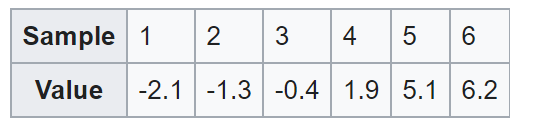

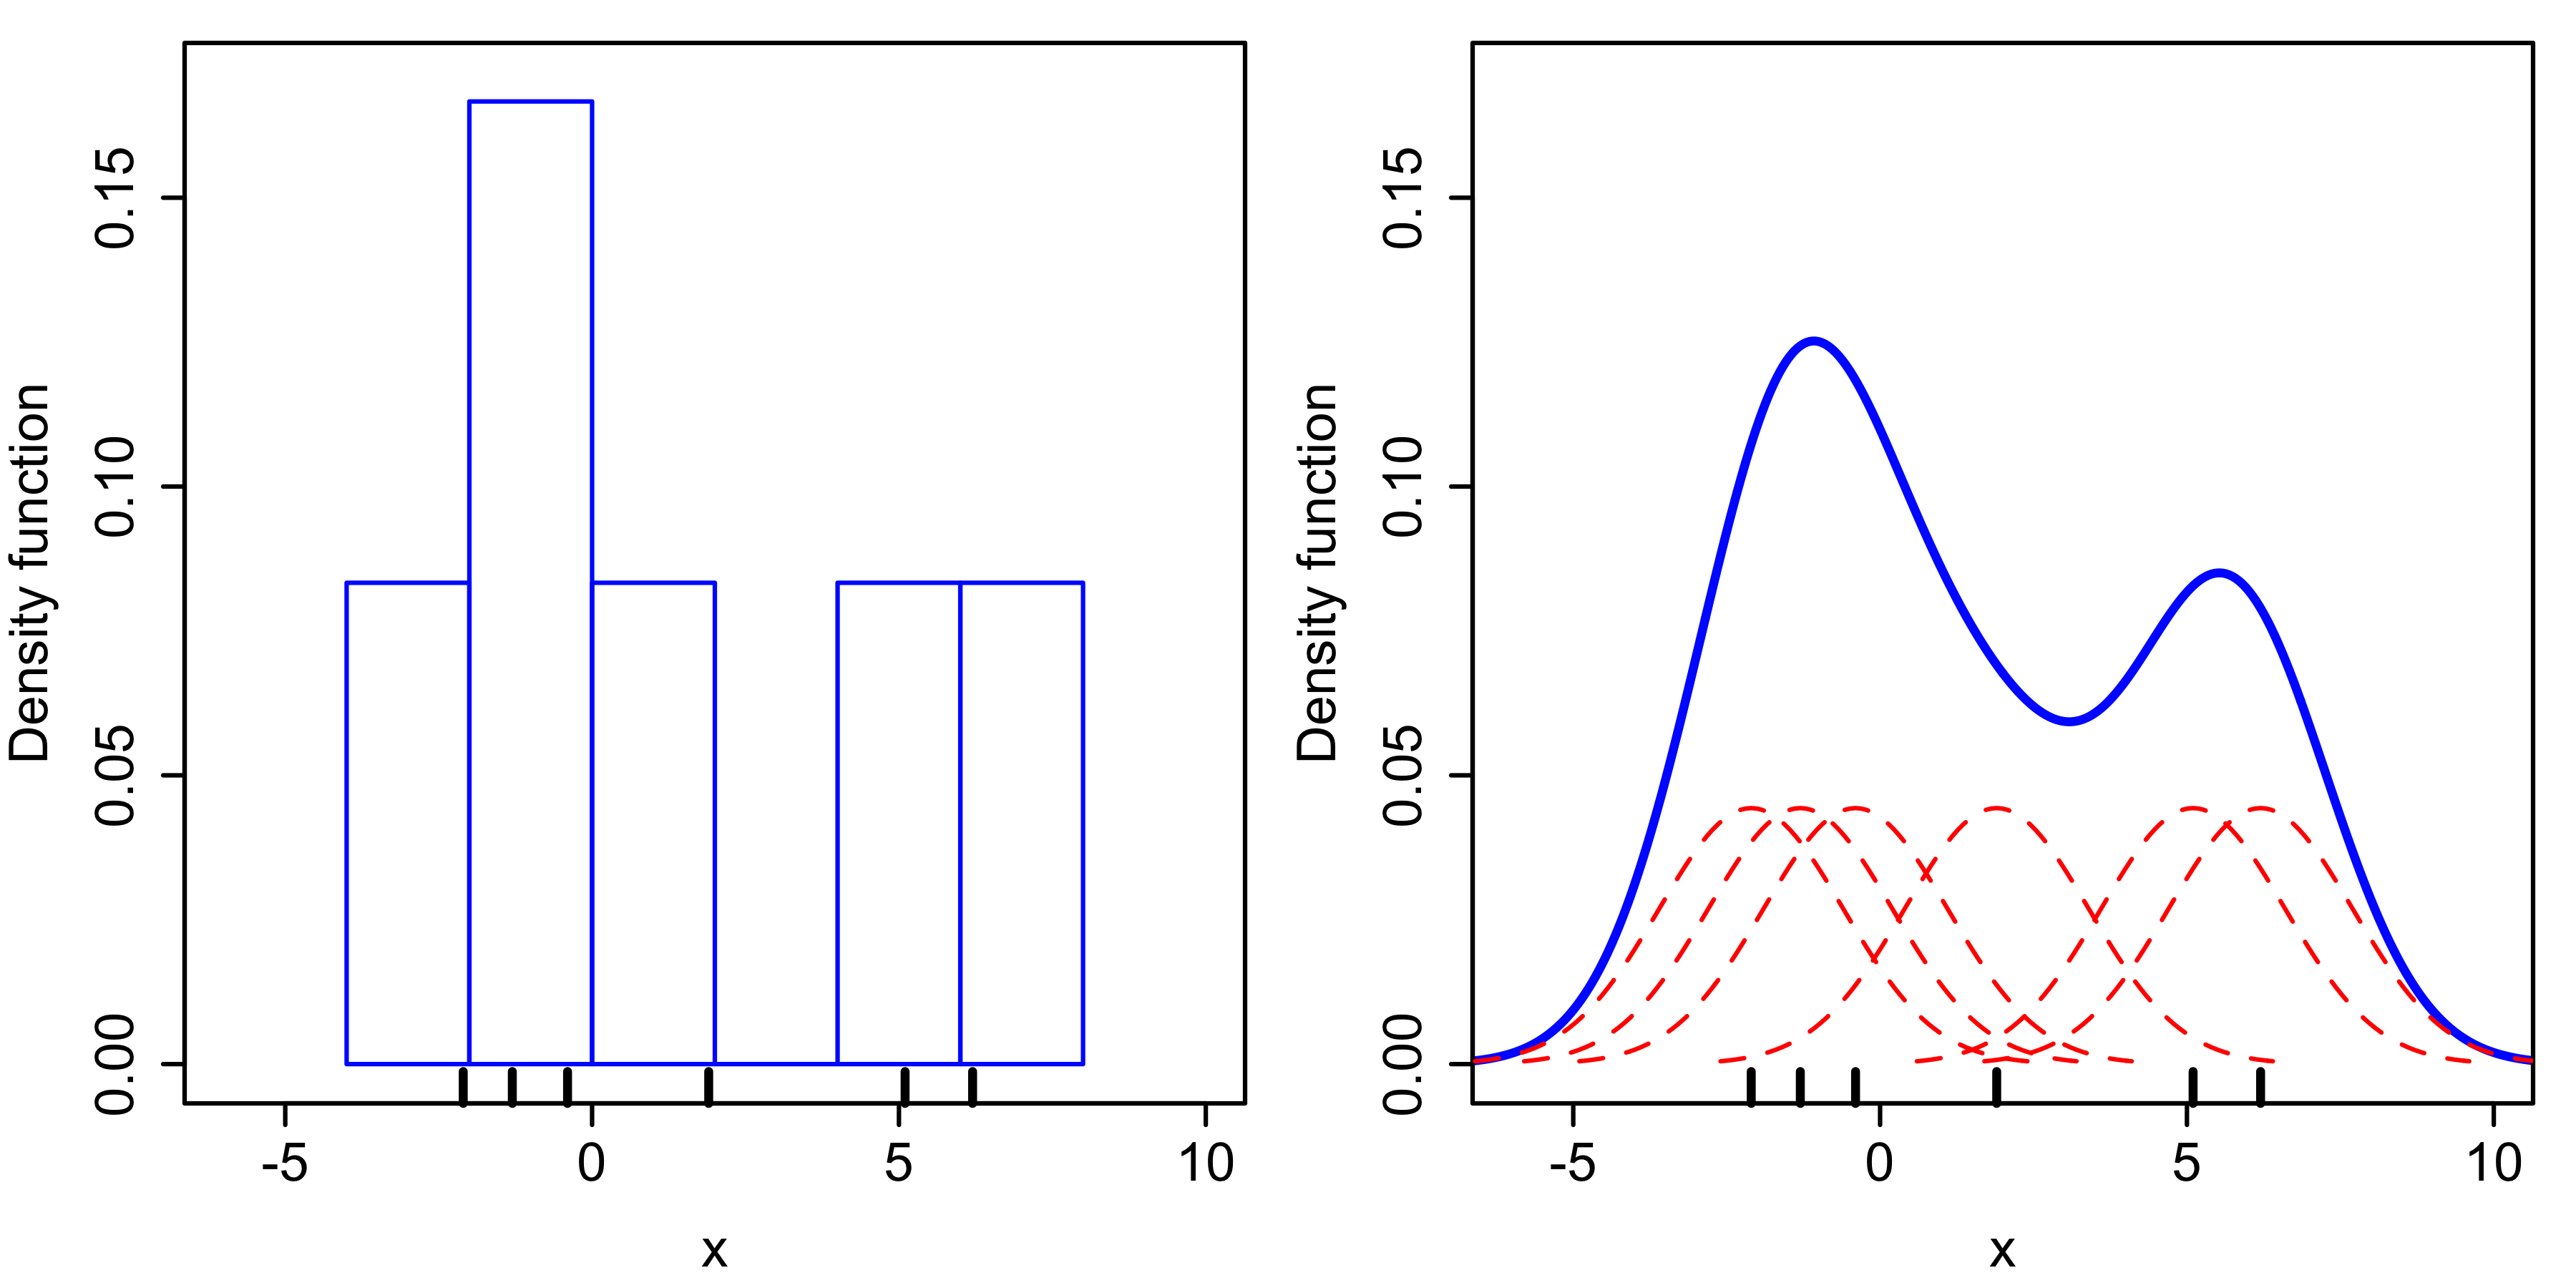

Source: 
- https://en.wikipedia.org/wiki/Kernel_density_estimation
- https://jakevdp.github.io/PythonDataScienceHandbook/05.13-kernel-density-estimation.html

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from scipy.stats import norm
import numpy as np
from sklearn.neighbors import KernelDensity

In [2]:
def make_data(N, f=0.3):
    x = np.random.randn(N)
    x[int(f * N):] += 5
    return x

x = make_data(20)

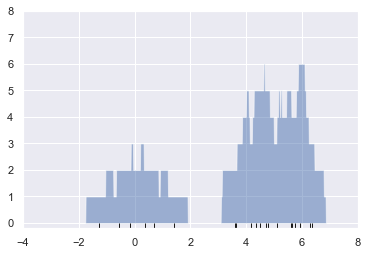

In [3]:
x_d = np.linspace(-4, 8, 1000)
density1 = sum((abs(i - x_d) < 0.5) for i in x)

plt.fill_between(x_d, density1, alpha=0.5)
plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)

plt.axis([-4, 8, -0.2, 8]);

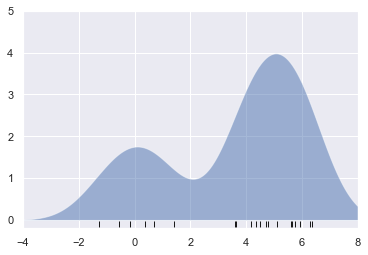

In [4]:
density2 = sum(norm(xi).pdf(x_d) for xi in x)

plt.fill_between(x_d, density2, alpha=0.5)
plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)

plt.axis([-4, 8, -0.2, 5]);

(-0.02, 0.22)

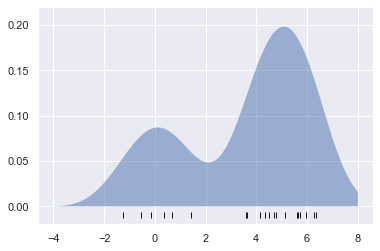

In [5]:
kde = KernelDensity(bandwidth=1.0, kernel='gaussian')
kde.fit(x[:, None])

logprob = kde.score_samples(x_d[:, None])

plt.fill_between(x_d, np.exp(logprob), alpha=0.5)
plt.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)
plt.ylim(-0.02, 0.22)

## Box Cox (Power) Transformation 

In statistics, a power transform is a family of functions applied to create a monotonic transformation of data using power functions. It is a data transformation technique used to stabilize variance, make the data more normal distribution-like, improve the validity of measures of association (such as the Pearson correlation between variables), and for other data stabilization procedures.

$X:[x_1, x_2, ... , x_n]\sim Pereto \rightarrow Y:[y_1, y_2, ... , y_n]\sim Gaussian$:
- $BoxCox(X)=\lambda$
- ${\displaystyle y_{i}={\begin{cases}{\dfrac {x_{i}^{\lambda }-1}{\lambda }}&{\text{if }}\lambda \neq 0,\\\ln x_{i}&{\text{if }}\lambda =0,\end{cases}}} ~~~\forall i\in[n]$

Source:
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html
- https://en.wikipedia.org/wiki/Power_transform#Box%E2%80%93Cox_transformation

In [6]:
from scipy import stats
import matplotlib.pyplot as plt

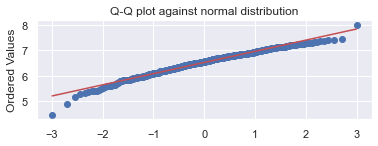

In [7]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
x = stats.loggamma.rvs(5, size=500) + 5
prob = stats.probplot(x, dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Q-Q plot against normal distribution')
plt.show()

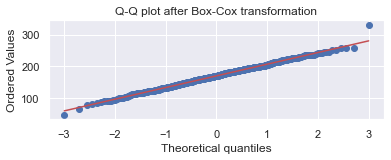

In [8]:
fig = plt.figure()
ax2 = fig.add_subplot(212)
xt, _ = stats.boxcox(x) #If the lmbda parameter is None, the second returned argument is the lmbda that maximizes the log-likelihood function
prob = stats.probplot(xt, dist=stats.norm, plot=ax2)
ax2.set_title('Q-Q plot after Box-Cox transformation')
plt.show()